In [37]:
import pandas as pd
import numpy as np
import tensorflow as tf
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

target = train.iloc[:, -1]


train.drop(train.columns[-1], axis=1, inplace=True)
train_id = train['Id']
test_id = test['Id']
train.drop('Id',axis=1, inplace=True)
test.drop('Id',axis=1, inplace=True)

benchmark = pd.read_csv('sample_submission.csv')
target_benchmark = benchmark.iloc[:, -1]

In [39]:
type(target)

pandas.core.series.Series

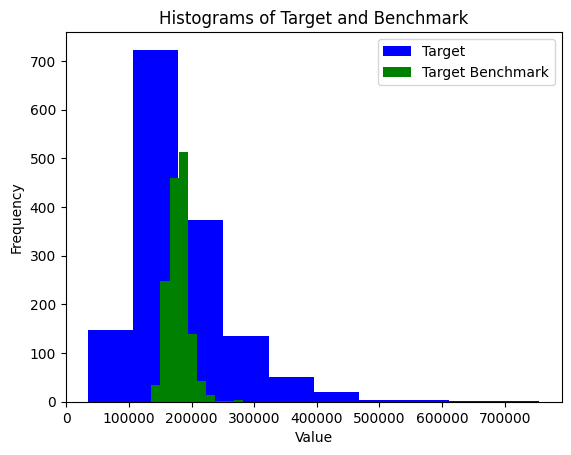

In [40]:
plt.hist(target, label='Target', color='blue')
plt.hist(target_benchmark, label='Target Benchmark', color='green')

plt.title('Histograms of Target and Benchmark')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend(loc='upper right')

plt.show()

In [41]:
benchmark.describe()

,Id,SalePrice
count,1459.000000,1459.000000
mean,2190.000000,179183.918243
std,421.321334,16518.303051
min,1461.000000,135751.318893
25%,1825.500000,168703.011202
50%,2190.000000,179208.665698
75%,2554.500000,186789.409363
max,2919.000000,281643.976117


(array([ 35., 248., 459., 513., 140.,  43.,  14.,   2.,   2.,   3.]),
 array([135751.31889282, 150340.58461521, 164929.85033761, 179519.11606001,
        194108.3817824 , 208697.6475048 , 223286.9132272 , 237876.1789496 ,
        252465.44467199, 267054.71039439, 281643.97611679]),
 <BarContainer object of 10 artists>)

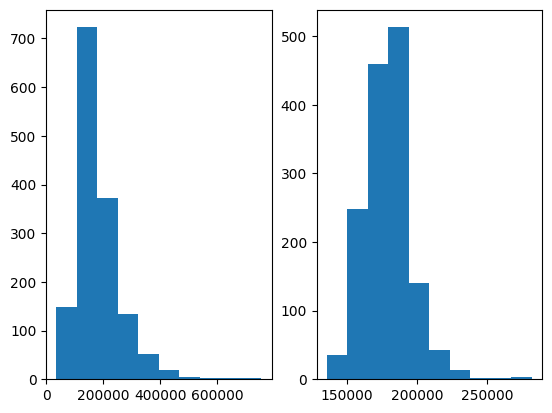

In [42]:
fig , ax = plt.subplots(1, 2)

ax[0].hist(target)
ax[1].hist(target_benchmark)

Both the target and benchmark have right skews and distribution varies greatly

In [43]:
target_benchmark.describe()

count      1459.000000
mean     179183.918243
std       16518.303051
min      135751.318893
25%      168703.011202
50%      179208.665698
75%      186789.409363
max      281643.976117
Name: SalePrice, dtype: float64

In [44]:
target.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Descriptive statistics for sales price of benchmark and target sale prices differ greatly

In [45]:
target = np.log1p(target)
target_benchmark = np.log1p(target_benchmark)
#log transformation to make meaningful metric comparison


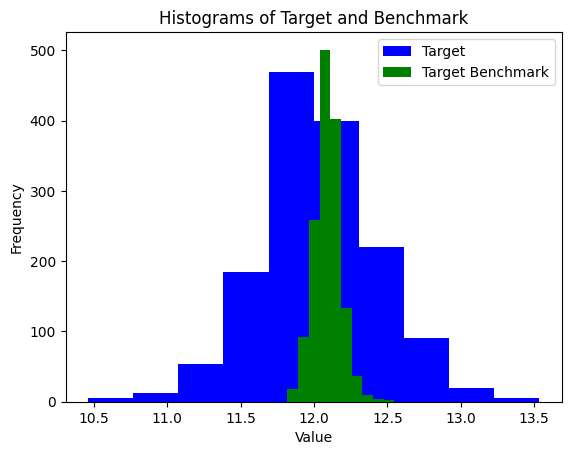

In [46]:
plt.hist(target, label='Target', color='blue')
plt.hist(target_benchmark, label='Target Benchmark', color='green')

plt.title('Histograms of Target and Benchmark')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend(loc='upper right')

plt.show()

(array([ 18.,  92., 259., 501., 402., 134.,  37.,   9.,   4.,   3.]),
 array([11.81858732, 11.89156885, 11.96455038, 12.03753191, 12.11051343,
        12.18349496, 12.25647649, 12.32945802, 12.40243955, 12.47542108,
        12.54840261]),
 <BarContainer object of 10 artists>)

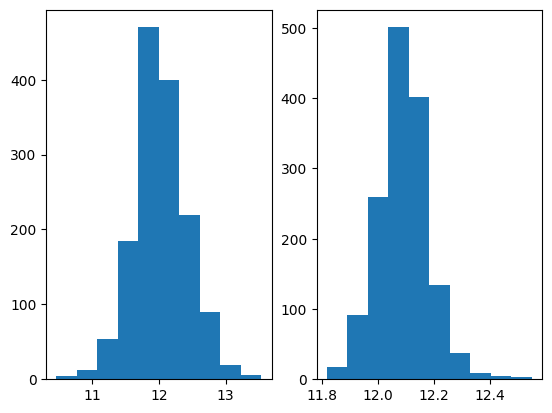

In [47]:
fig , ax = plt.subplots(1, 2)
ax[0].hist(target)
ax[1].hist(target_benchmark)

In [48]:
train = pd.get_dummies(train)
test = pd.get_dummies(test)

for col in train.columns: 
    missing = sum(train[col].isnull())
    if missing > 0:
        print('{}-{}'.format(col, missing))


LotFrontage-259
MasVnrArea-8
GarageYrBlt-81


In [49]:
for col in test.columns: 
    missing = sum(test[col].isnull())
    if missing > 0:
        print('{}-{}'.format(col, missing))

LotFrontage-227
MasVnrArea-15
BsmtFinSF1-1
BsmtFinSF2-1
BsmtUnfSF-1
TotalBsmtSF-1
BsmtFullBath-2
BsmtHalfBath-2
GarageYrBlt-78
GarageCars-1
GarageArea-1


In [50]:
#filling values with 1 or 2 NA entries as this is likely an error with spreadsheets as they also have values of 0
for col in test.columns:
    missing = sum(test[col].isnull())
    if missing in [1, 2]:
        test[col].fillna(0, inplace=True)

for col in test.columns: 
    missing = sum(test[col].isnull())
    if missing > 0:
        print('{}-{}'.format(col, missing))

LotFrontage-227
MasVnrArea-15
GarageYrBlt-78


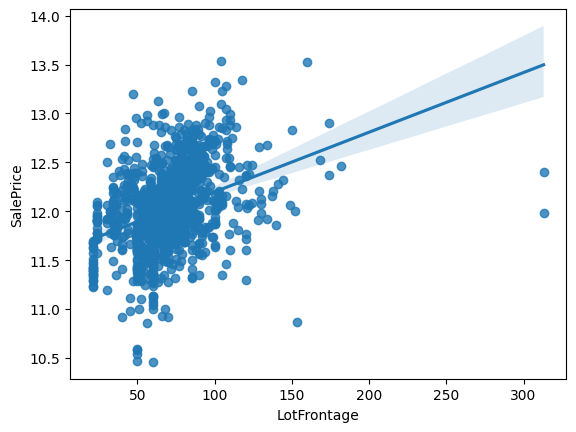

In [51]:
sns.regplot(x=train['LotFrontage'], y=target)
plt.show()

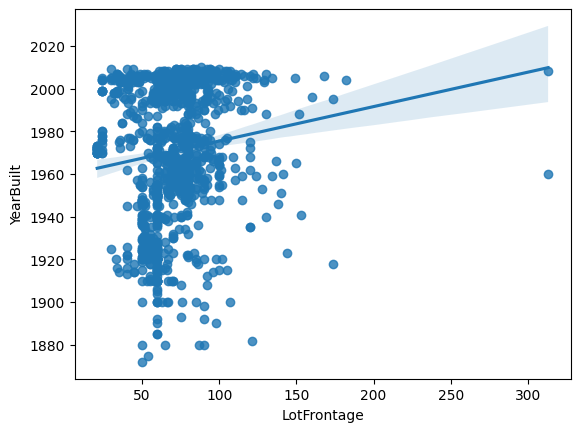

In [52]:
sns.regplot(x=train['LotFrontage'], y=train['YearBuilt'])
plt.show()

In [53]:
combined = pd.concat([train,test],axis=0)
for col in combined.columns: 
    missing = sum(combined[col].isnull())
    if missing > 0:
        print('{}-{}'.format(col, missing))

print(type(train))
print(type(combined))

LotFrontage-486
MasVnrArea-23
GarageYrBlt-159
Utilities_NoSeWa-1459
Condition2_RRAe-1459
Condition2_RRAn-1459
Condition2_RRNn-1459
HouseStyle_2.5Fin-1459
RoofMatl_ClyTile-1459
RoofMatl_Membran-1459
RoofMatl_Metal-1459
RoofMatl_Roll-1459
Exterior1st_ImStucc-1459
Exterior1st_Stone-1459
Exterior2nd_Other-1459
Heating_Floor-1459
Heating_OthW-1459
Electrical_Mix-1459
GarageQual_Ex-1459
PoolQC_Fa-1459
MiscFeature_TenC-1459
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [54]:
#neighborhood has been one-hot encoded, this will be reversed for a separate column
neighborhood_cols = [col for col in combined.columns if col.startswith('Neighborhood_')]

def get_neighborhood(row):
    for col in neighborhood_cols:
        if row[col] == 1:
            return col.replace('Neighborhood_', '')
    return 'Unknown'

combined['Neighborhood'] = combined.apply(get_neighborhood, axis=1)

print(combined['Neighborhood'].head())

0    CollgCr
1    Veenker
2    CollgCr
3    Crawfor
4    NoRidge
Name: Neighborhood, dtype: object


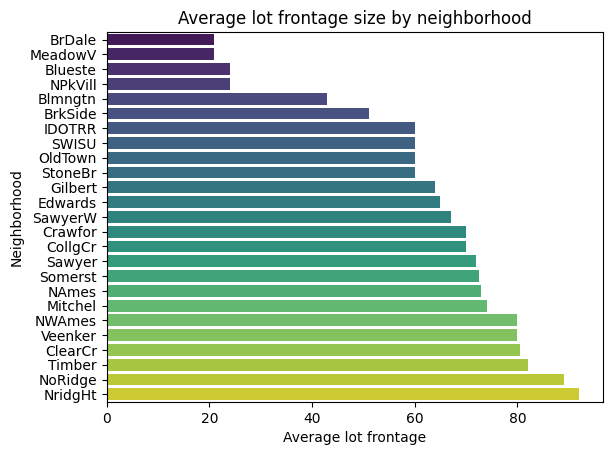

In [55]:
#To deal with empty lot frontage values, they will be filled in by the median lot frontage of each house's respective neighborhood
avg_lotfrontage = combined.groupby('Neighborhood')['LotFrontage'].median().sort_values()

sns.barplot(x=avg_lotfrontage.values, y=avg_lotfrontage.index, palette='viridis')
plt.xlabel('Average lot frontage')
plt.ylabel('Neighborhood')
plt.title('Average lot frontage size by neighborhood')
plt.show()

In [56]:
#lot frontage has a clear relationship with its respective neighborhood
#filling NA values of lot frontage with its respective neighborhood average lot frontage

def fill_lotfrontage(row):
    if pd.isna(row['LotFrontage']):
        return avg_lotfrontage[row['Neighborhood']]
    return row['LotFrontage']

combined['LotFrontage'] = combined.apply(fill_lotfrontage, axis=1)
print(combined['LotFrontage'].isnull().sum())


0


In [57]:
combined['GarageYrBlt'].fillna(combined['YearBuilt'], inplace=True)

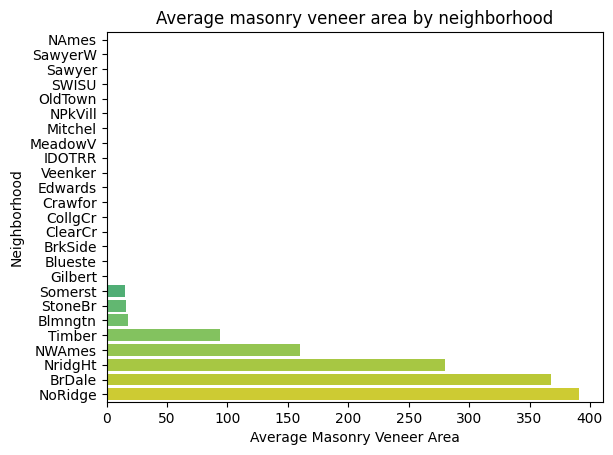

In [58]:
avg_masvnrarea = combined.groupby('Neighborhood')['MasVnrArea'].median().sort_values()

sns.barplot(x=avg_masvnrarea.values, y=avg_masvnrarea.index, palette='viridis')
plt.xlabel('Average Masonry Veneer Area')
plt.ylabel('Neighborhood')
plt.title('Average masonry veneer area by neighborhood')
plt.show()

In [59]:
#seeing what neighborhood belongs to each NA masonry veneer area row
na_masvnrarea = combined[combined['MasVnrArea'].isnull()]

na_masvnrarea_neighborhood = na_masvnrarea[['Neighborhood', 'MasVnrArea']]

print(na_masvnrarea_neighborhood)

     Neighborhood  MasVnrArea
234       Gilbert         NaN
529       Crawfor         NaN
650       Somerst         NaN
936       SawyerW         NaN
973       Somerst         NaN
977       Somerst         NaN
1243      NridgHt         NaN
1278      CollgCr         NaN
231       Gilbert         NaN
246       Somerst         NaN
422       CollgCr         NaN
532       Gilbert         NaN
544       Somerst         NaN
581       Somerst         NaN
851       Gilbert         NaN
865       Gilbert         NaN
880       Somerst         NaN
889       Somerst         NaN
908       Somerst         NaN
1132       Timber         NaN
1197      NridgHt         NaN
1226      Somerst         NaN
1402      Edwards         NaN


In [60]:
#NA values do not necessarily mean it should be filled with zero, instead, average masonry veneer by neighborhood is applied due to patterns observed
def fill_masvnrarea(row):
    if pd.isna(row['MasVnrArea']):
        return avg_masvnrarea[row['Neighborhood']]
    return row['MasVnrArea']

combined['MasVnrArea'] = combined.apply(fill_masvnrarea, axis=1)
print(combined['MasVnrArea'].isnull().sum())

0


In [61]:
from sklearn.impute import SimpleImputer
mean_imputer = SimpleImputer()
mean_imputer.fit(train)
combined = combined.drop(columns=['Neighborhood'])


combined = pd.DataFrame(mean_imputer.transform(combined))

In [62]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
combined = pd.DataFrame(scaler.fit_transform(combined))
print(combined.describe().T[['mean', 'std', 'min', 'max']].sort_values(by='std', ascending=False))

         mean       std  min  max
112  0.503940  0.500070  0.0  1.0
226  0.511134  0.499962  0.0  1.0
211  0.511477  0.499954  0.0  1.0
177  0.448099  0.497384  0.0  1.0
184  0.439534  0.496415  0.0  1.0
..        ...       ...  ...  ...
271  0.000685  0.018506  0.0  1.0
126  0.000685  0.018506  0.0  1.0
128  0.000685  0.018506  0.0  1.0
103  0.000685  0.018506  0.0  1.0
139  0.000685  0.018506  0.0  1.0

[287 rows x 4 columns]


In [63]:
#converting bool values to float
combined = combined.astype(float)

In [64]:
test = combined.iloc[-len(test_id):, :]
train = combined.iloc[:-len(test_id), :]
train[target] = target

In [65]:
X = train.drop(target, axis=1)
y = target

x_test = test
y_test = target_benchmark

In [66]:
from tensorflow import keras
from keras import layers
from keras import callbacks

model = keras.Sequential([
    layers.Dense(256, activation='relu', input_shape=[X.shape[1]]),
    layers.BatchNormalization(),
    layers.Dropout(0.2),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.2),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.2),
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.2),
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.2),
    layers.Dense(1)
])

In [67]:
early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=150, restore_best_weights=True, start_from_epoch=100)

In [68]:
huber = keras.losses.Huber(delta=0.05)
model.compile(loss = huber, optimizer='adam')

In [69]:
history = model.fit(X, y,
                    batch_size = 256,
                    epochs = 2000,
                    validation_split = 0.2,
                    callbacks=[early_stopping])
df_history = pd.DataFrame(history.history)

Epoch 1/2000
5/5 [==============================] - 2s 43ms/step - loss: 0.5970 - val_loss: 0.5962
Epoch 2/2000
5/5 [==============================] - 0s 10ms/step - loss: 0.5925 - val_loss: 0.5928
Epoch 3/2000
5/5 [==============================] - 0s 10ms/step - loss: 0.5897 - val_loss: 0.5878
Epoch 4/2000
5/5 [==============================] - 0s 9ms/step - loss: 0.5875 - val_loss: 0.5833
Epoch 5/2000
5/5 [==============================] - 0s 10ms/step - loss: 0.5836 - val_loss: 0.5795
Epoch 6/2000
5/5 [==============================] - 0s 10ms/step - loss: 0.5778 - val_loss: 0.5759
Epoch 7/2000
5/5 [==============================] - 0s 10ms/step - loss: 0.5722 - val_loss: 0.5720
Epoch 8/2000
5/5 [==============================] - 0s 10ms/step - loss: 0.5690 - val_loss: 0.5678
Epoch 9/2000
5/5 [==============================] - 0s 10ms/step - loss: 0.5657 - val_loss: 0.5641
Epoch 10/2000
5/5 [==============================] - 0s 10ms/step - loss: 0.5584 - val_loss: 0.5597
Epoch 11/2

In [70]:
#rmse for train
from sklearn.metrics import mean_squared_error
y_pred = model.predict(X)
print('Train RMSE: ', np.sqrt(mean_squared_error(y, y_pred)))


46/46 [==============================] - 0s 847us/step
Train RMSE:  0.11626065499560093


In [71]:
#rmse for test and reversing log transformation
y_pred = model.predict(test)
y_pred = np.expm1(y_pred)
y_pred = pd.DataFrame(y_pred, index = test_id, columns=['SalePrice'])
y_pred.to_csv('submission.csv')


46/46 [==============================] - 0s 840us/step


In [72]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

gbr_model = GradientBoostingRegressor()

gbr_model.get_params()

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'squared_error',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [73]:
params = {
    'learning_rate': [0.01, 0.02, 0.03],
    'max_depth': [2, 4, 6, 8, 10],
    'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 100],
    'subsample': [0.8, 0.9, 1.0]
}

random_search = RandomizedSearchCV(
    estimator=gbr_model,
    param_distributions=params,
    scoring='neg_mean_squared_error',
    cv=10,
    n_jobs=1,
)

In [74]:
random_search.fit(X, y)

In [ ]:
from sklearn.metrics import make_scorer
best_model = random_search.best_estimator_


In [ ]:
y_pred = best_model.predict(X)
print('Train RMSE: ', np.sqrt(mean_squared_error(y, y_pred)))

Train RMSE:  0.04879600352085993


In [ ]:
y_pred = best_model.predict(test)
y_pred = np.expm1(y_pred)
y_pred = pd.DataFrame(y_pred, index=test_id, columns=['SalePrice'])
y_pred.to_csv('submission.csv')